In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfw=pd.read_csv('/content/drive/MyDrive/Olist/Tablas/Tabla1FinalCorrejida.csv' , sep=';')

In [3]:
dfw=dfw.drop(columns=['Estados','order_id','customer_id','order_item_id','product_id','seller_id','freight_value','customer_unique_id','customer_zip_code_prefix','customer_city'])


In [4]:
dfw['order_purchase_timestamp']=pd.to_datetime(dfw['order_purchase_timestamp'])

In [5]:
dfw['fecha']= dfw['order_purchase_timestamp'].dt.date

In [6]:
dfw

,order_purchase_timestamp,price,product_category_name,fecha
0,2017-08-03 10:39:39,199.00,telephony,2017-08-03
1,2017-05-13 13:16:20,16.90,NaN,2017-05-13
2,2017-07-06 17:11:14,300.00,luggage_accessories,2017-07-06
3,2017-12-23 16:45:12,239.00,electronics,2017-12-23
4,2017-07-17 18:19:50,56.99,perfumery,2017-07-17
...,...,...,...,...
110111,2017-02-28 12:39:01,120.99,sports_leisure,2017-02-28
110112,2018-03-09 11:50:45,52.99,perfumery,2018-03-09
110113,2018-01-18 11:52:59,145.99,auto,2018-01-18
110114,2018-04-16 20:51:56,21.99,telephony,2018-04-16


In [7]:
dfw=dfw[dfw['product_category_name']=='watches_gifts']

In [8]:
dfw['fecha']=pd.to_datetime(dfw['fecha'])
dfw=dfw.groupby('fecha')['price'].sum().reset_index()

<ipython-input-8-9fff4452a7ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['fecha']=pd.to_datetime(dfw['fecha'])


In [9]:
dfw

,fecha,price
0,2016-10-03,29.90
1,2016-10-06,1282.17
2,2016-10-08,1399.00
3,2017-01-07,149.00
4,2017-01-10,699.17
...,...,...
566,2018-08-25,389.55
567,2018-08-26,186.00
568,2018-08-27,97.00
569,2018-08-28,59.00


In [10]:
dfw.reset_index(level=0,inplace=True)
dfw.rename(columns= {'fecha': 'ds', 'price' : 'y'}, inplace = True)

In [11]:
data=dfw

In [26]:
from prophet import Prophet

# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)

# Entrenamos el modelo
prophet.fit(data)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 6 años.
build_forecast = prophet.make_future_dataframe(periods=(6*52), freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd3rq3rab/119re2q3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd3rq3rab/g5heh_oc.json
11:51:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71417', 'data', 'file=/tmp/tmpd3rq3rab/119re2q3.json', 'init=/tmp/tmpd3rq3rab/g5heh_oc.json', 'output', 'file=/tmp/tmpd3rq3rab/prophet_modelxvw8q1i1/prophet_model-20231206115131_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=71417', 'data', 'file=/tmp/tmpd3rq3rab/119re2q3.json', 'init=/tmp/tmpd3rq3rab/g5heh_oc.json', 'output', 'file=/tmp/tmpd3rq3rab/prophet_modelxvw8q1i1/prophet_model-20231206115131_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

11:51:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71417', 'data', 'file=/tmp/tmpd3rq3rab/119re2q3.json', 'init=/tmp/tmpd3rq3rab/g5heh_oc.json', 'output', 'file=/tmp/tmpd3rq3rab/prophet_modelxvw8q1i1/prophet_model-20231206115131_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpd3rq3rab/prophet_modelxvw8q1i1/prophet_model-20231206115131_1.csv
 console_msgs (if any):
	/tmp/tmpd3rq3rab/prophet_modelxvw8q1i1/prophet_model-20231206115131_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


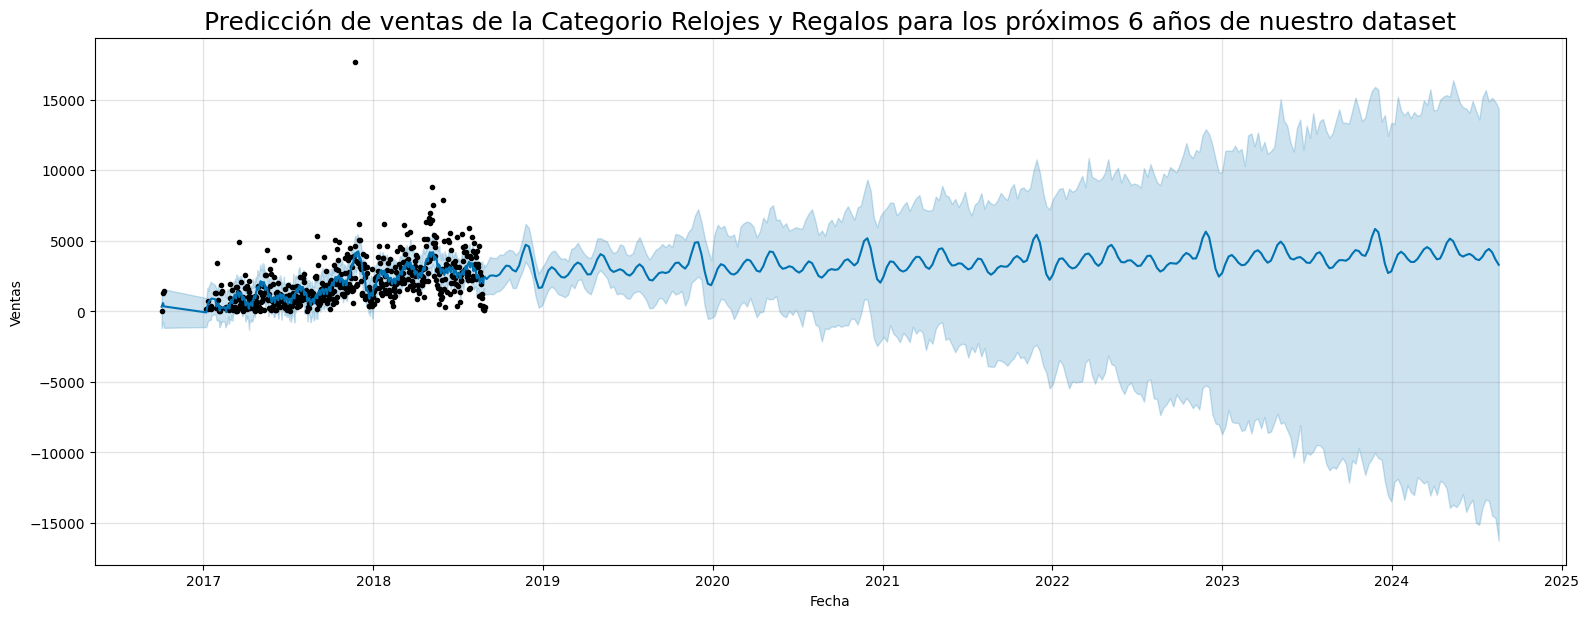

In [24]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize = (16,6))
plt.title('Predicción de ventas de la Categorio Relojes y Regalos para los próximos 6 años de nuestro dataset', fontsize = 18)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd3rq3rab/k_k1yoo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd3rq3rab/28g3smnl.json
11:53:01 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92696', 'data', 'file=/tmp/tmpd3rq3rab/k_k1yoo_.json', 'init=/tmp/tmpd3rq3rab/28g3smnl.json', 'output', 'file=/tmp/tmpd3rq3rab/prophet_modelobcu4zl3/prophet_model-20231206115301_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=92696', 'data', 'file=/tmp/tmpd3rq3rab/k_k1yoo_.json', 'init=/tmp/tmpd3rq3rab/28g3smnl.json', 'output', 'file=/tmp/tmpd3rq3rab/prophet_modelobcu4zl3/prophet_model-20231206115301_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

11:53:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92696', 'data', 'file=/tmp/tmpd3rq3rab/k_k1yoo_.json', 'init=/tmp/tmpd3rq3rab/28g3smnl.json', 'output', 'file=/tmp/tmpd3rq3rab/prophet_modelobcu4zl3/prophet_model-20231206115301_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpd3rq3rab/prophet_modelobcu4zl3/prophet_model-20231206115301_1.csv
 console_msgs (if any):
	/tmp/tmpd3rq3rab/prophet_modelobcu4zl3/prophet_model-20231206115301_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


Text(0.5, 1.02, 'Prediccion de ventas a 6 años con aumento de 40% (pandemia) para Relojes y Regalos')

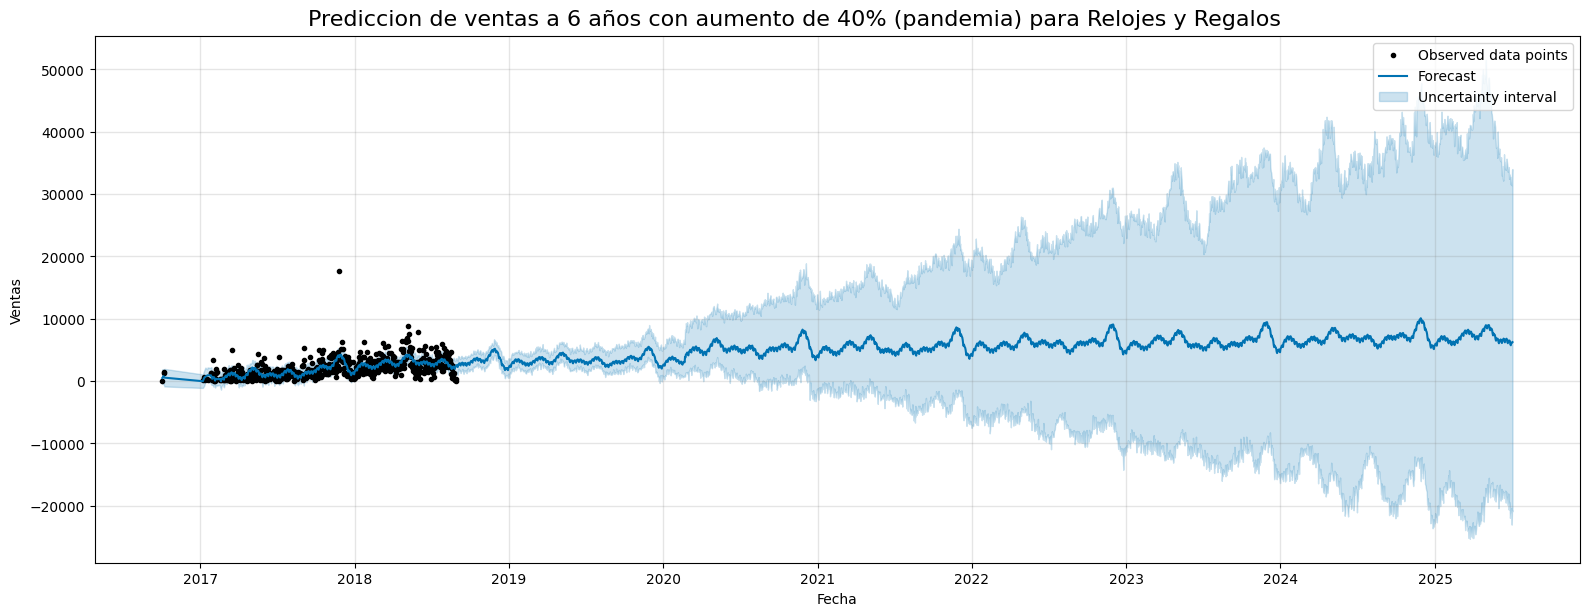

In [29]:
# Instanciamos un modelo de Prophet
fecha_inicio_incremento = '2020-1-23'



prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)


prophet.add_seasonality(name='Pandemia', period=730, fourier_order=10, prior_scale=0.1, mode='multiplicative', condition_name='custom_condition')
# Identifica las fechas a las que se aplicará el incremento
data['custom_condition'] = (data['ds'] >= fecha_inicio_incremento).astype(int)


# Entrenamos el modelo
prophet.fit(data)

# Crear un DataFrame de fechas futuras para las predicciones
future = prophet.make_future_dataframe(periods=2500)

# Identifica las fechas futuras a las que se aplicará el incremento
future['custom_condition'] = (future['ds'] >= fecha_inicio_incremento).astype(int)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 6 años.
# build_forecast = prophet.make_future_dataframe(periods=(6*52), freq='W') #

# Predecimos
forecast = prophet.predict(future)
# print(forecast['yhat'])
# print(type(forecast['yhat']))
# Multiplicar las predicciones por el incremento


forecast.loc[forecast.index > 1111 , 'yhat']*=1.4
forecast.loc[forecast.index > 1111 , 'yhat_lower']*=1.4
forecast.loc[forecast.index > 1111 , 'yhat_upper']*=1.4

# Visualizar las predicciones

fig=prophet.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize = (16,6), include_legend=True)
fig.suptitle('Prediccion de ventas a 6 años con aumento de 40% (pandemia) para Relojes y Regalos', y=1.02, fontsize=16)
